## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [3]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [4]:
telecom = pd.read_csv("../data/Telecom-churn.csv") 
print(telecom.shape) # zobrazíme rozmer dátovej tabuľky v tvare (počet riadkov, počet stĺpcov)
print(telecom.columns)
telecom.head()

(7043, 21)
Index(['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telecom.drop(columns=['CustomerID'], inplace=True)
telecom["SeniorCitizen"] = telecom["SeniorCitizen"].map({0: 'No', 1: 'Yes'})
telecom["TotalCharges"] = pd.to_numeric(telecom.TotalCharges, errors='coerce')
telecom.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [6]:
telecom.describe() #TotalCharges musime zmenit na float, lebo ich nepridavalo k ciselnym atributom

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7017.000000,7032.000000
mean,32.371149,64.707482,2283.300441
std,24.559481,30.105503,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.400000,401.450000
50%,29.000000,70.300000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


C:\Users\havra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\havra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


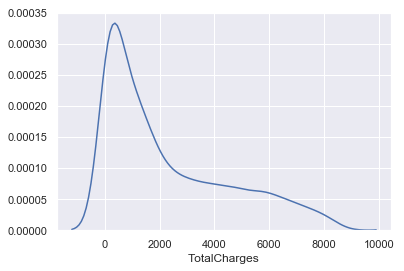

In [11]:
g = sns.distplot(telecom['TotalCharges'], kde=True, hist=False)

C:\Users\havra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\havra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


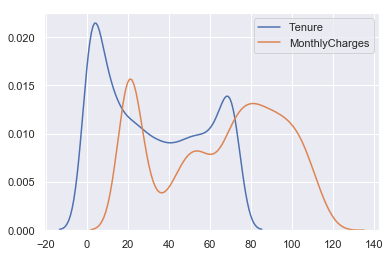

In [7]:
for col in ['Tenure', 'MonthlyCharges']:   
    sns.kdeplot(telecom[col])    

Male      3555
Female    3488
Name: Gender, dtype: int64


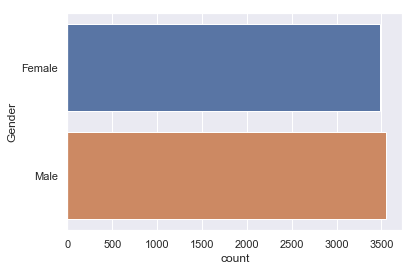

In [32]:
print(telecom['Gender'].value_counts())
g = sns.countplot(y='Gender', data=telecom)


No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64


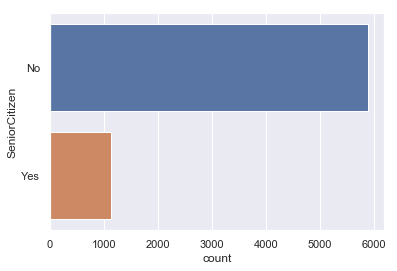

In [8]:
print(telecom['SeniorCitizen'].value_counts())
g = sns.countplot(y='SeniorCitizen',data=telecom)

No     3641
Yes    3402
Name: Partner, dtype: int64


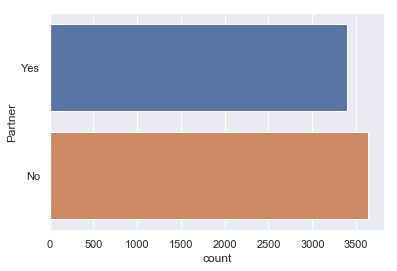

In [33]:
print(telecom['Partner'].value_counts())
g = sns.countplot(y='Partner', data=telecom)

No     4921
Yes    2102
Name: Dependents, dtype: int64


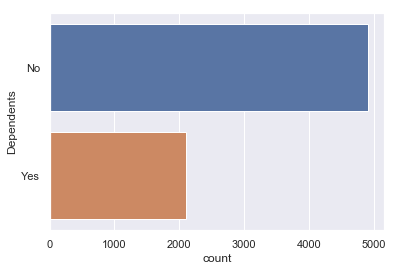

In [9]:
print(telecom['Dependents'].value_counts())
g = sns.countplot(y='Dependents', data=telecom)

Yes    6361
No      682
Name: PhoneService, dtype: int64


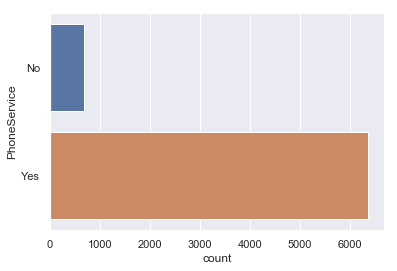

In [34]:
print(telecom['PhoneService'].value_counts())
g = sns.countplot(y='PhoneService', data=telecom)


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


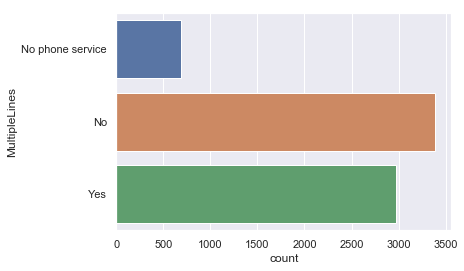

In [10]:
print(telecom['MultipleLines'].value_counts())
g = sns.countplot(y='MultipleLines', data=telecom)


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


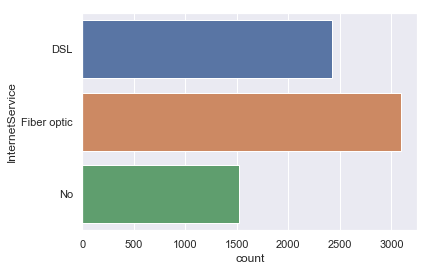

In [35]:
print(telecom['InternetService'].value_counts())
g = sns.countplot(y='InternetService', data=telecom)

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


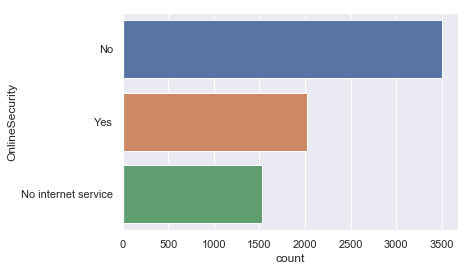

In [11]:
print(telecom['OnlineSecurity'].value_counts())
g = sns.countplot(y='OnlineSecurity', data=telecom)

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


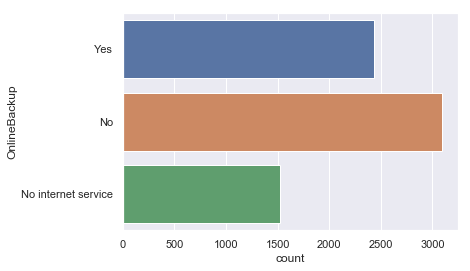

In [36]:
print(telecom['OnlineBackup'].value_counts())
g = sns.countplot(y='OnlineBackup', data=telecom)

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


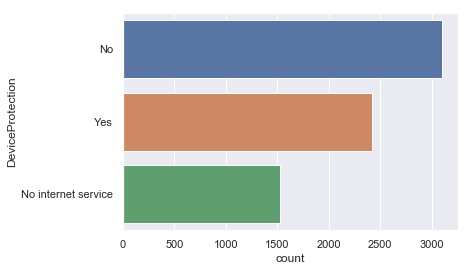

In [12]:
print(telecom['DeviceProtection'].value_counts())
g = sns.countplot(y='DeviceProtection', data=telecom)

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


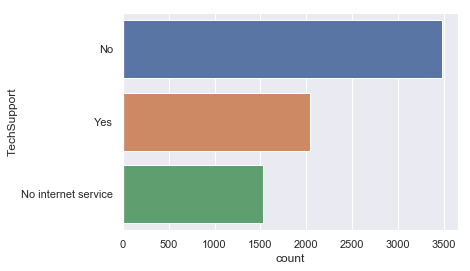

In [37]:
print(telecom['TechSupport'].value_counts())
g = sns.countplot(y='TechSupport', data=telecom)

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


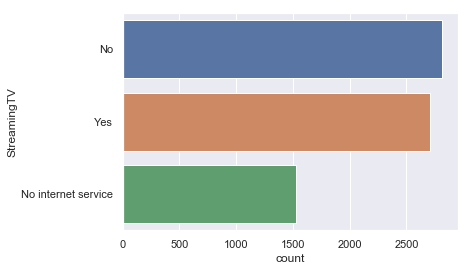

In [13]:
print(telecom['StreamingTV'].value_counts())
g = sns.countplot(y='StreamingTV', data=telecom)

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


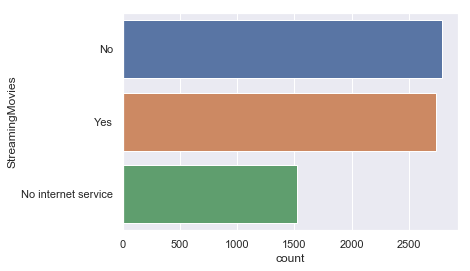

In [38]:
print(telecom['StreamingMovies'].value_counts())
g = sns.countplot(y='StreamingMovies', data=telecom)

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


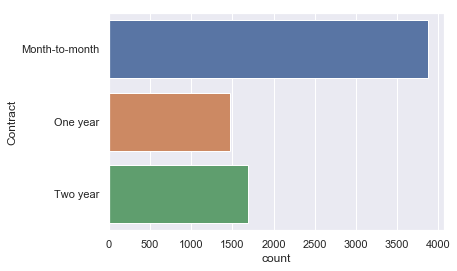

In [14]:
print(telecom['Contract'].value_counts())
g = sns.countplot(y='Contract', data=telecom)

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


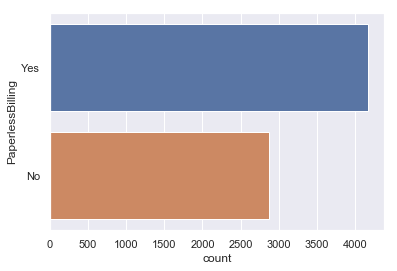

In [39]:
print(telecom['PaperlessBilling'].value_counts())
g = sns.countplot(y='PaperlessBilling', data=telecom)

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


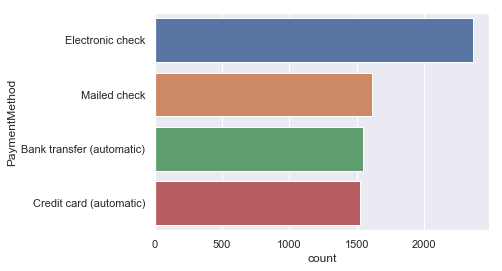

In [15]:
print(telecom['PaymentMethod'].value_counts())
g = sns.countplot(y='PaymentMethod', data=telecom)

No     5174
Yes    1869
Name: Churn, dtype: int64


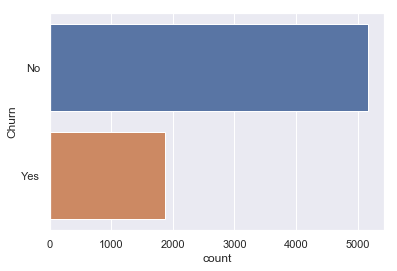

In [40]:
print(telecom['Churn'].value_counts())
g = sns.countplot(y='Churn', data=telecom)

In [16]:
telecom.isnull().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents          20
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        11
Churn                0
dtype: int64

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

In [17]:
corr_table = telecom.corr()
corr_table

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.247732,0.825880
MonthlyCharges,0.247732,1.000000,0.651316
TotalCharges,0.825880,0.651316,1.000000


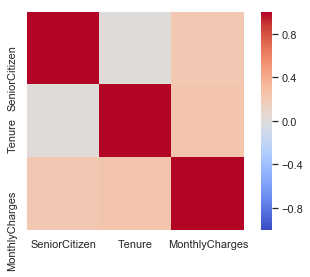

In [42]:
p = sns.heatmap(corr_table,
                xticklabels=corr_table.columns, yticklabels=corr_table.columns,
                vmin=-1, vmax=1,
                cmap='coolwarm', 
                square=True)                       #NAJVIAC KORELOVANE SU ATRIBUTY 'Tenure' a 'TotalCharges'

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [18]:
telecom['MonthlyCharges'].describe()

count    7017.000000
mean       64.707482
std        30.105503
min        18.250000
25%        35.400000
50%        70.300000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [19]:
telecom['MonthlyCharges'] = pd.cut(telecom['MonthlyCharges'], 5) 
telecom['MonthlyCharges'].value_counts() #18-38,38-58,58-78,78-98,98-118

(78.55, 98.65]     1817
(18.15, 38.35]     1797
(58.45, 78.55]     1361
(98.65, 118.75]    1042
(38.35, 58.45]     1000
Name: MonthlyCharges, dtype: int64

In [20]:
telecom['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [22]:
telecom['TotalCharges'] = pd.cut(telecom['TotalCharges'], 5)
telecom['TotalCharges'].value_counts() 

TypeError: unorderable types: Interval() <= float()

### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [ ]:
# YOUR CODE HERE

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [ ]:
# YOUR CODE HERE

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [ ]:
# YOUR CODE HERE

### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [ ]:
# YOUR CODE HERE

### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [ ]:
# YOUR CODE HERE

### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [ ]:
# YOUR CODE HERE

### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

In [ ]:
# YOUR CODE HERE

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [ ]:
# YOUR CODE HERE